In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def makeArange(yaxis,start = 0,step = 1, dtype = None):
    return arange(0,size(yaxis))


Populating the interactive namespace from numpy and matplotlib


In [2]:
IncomingPower = genfromtxt('C:\Users\Brendan\Documents\MATLAB\incomingPower.csv', delimiter=',')
#~16 orbits worth of simulated incoming power from the matlab simulation. 
modePower = pd.read_csv('C:\Users\Brendan\OneDrive\Documents\ModePowers.csv')
#power for each mode
modes = {0:'1a',1:'1b',2:'1c',3:'2a',4:'2b',5:'2c',6:'2d',7:'2e',8:'3a',9:'3b',10:'4a',11:'4b'}
modes_str = {v: k for k, v in modes.items()}
#not sure if this is 

1.371
0.961290943414 Wh per orbit when idle
1.04026778454 orbits per Wh charged


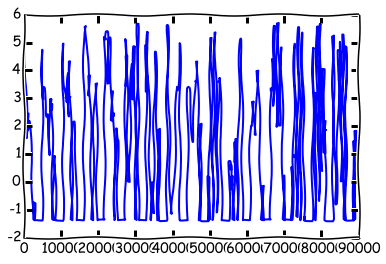

In [12]:

averageIncomingPower = average(IncomingPower)
#plot(makeArange(IncomingPower)[0:5400], IncomingPower[0:5400])
#print shape(IncomingPower)[0]
a = zeros(shape(IncomingPower)[0])
for x in makeArange(IncomingPower):
    if(IncomingPower[x] == 0):
        a[x] = 1
eclipseEndTimes = []
eclipseBeginTimes = []
for x in makeArange(IncomingPower)[5:-5]:
    eclipseEnd = False
    flagWrong = False
    for y in arange(0,5):
        if IncomingPower[x-y] != 0:
            flagWrong = True
            break
    
    if flagWrong:
        continue
    else:
        flagWrong = False
        if IncomingPower[x+1] != 0:
            eclipseEndTimes.append(x)
for x in makeArange(IncomingPower)[5:-5]:
    eclipseBegin = False
    flagWrong = False
    for y in arange(0,5):
        if IncomingPower[x-y] == 0:
            flagWrong = True
            break
    if flagWrong:
            continue
    else:
        flagWrong = False
        if IncomingPower[x+1] == 0:
            eclipseBeginTimes.append(x)
orbitTimes = zeros(size(eclipseEndTimes)-1)

eclipseEndTimes = array(eclipseEndTimes)
eclipseBeginTimes = array(eclipseBeginTimes)
#print eclipseBeginTimes
eclipseTimes = eclipseEndTimes-eclipseBeginTimes

#print array(eclipseEndTimes)
#print eclipseBeginTimes
#print array(eclipseEndTimes)-array(eclipseBeginTimes)

for x in arange(0,size(eclipseEndTimes))[1:]:
    orbitTimes[x-1] = eclipseEndTimes[x]-eclipseEndTimes[x-1]

#print orbitTimes
eclipseTimeAverage = average(eclipseTimes)
orbitTimeAverage = average(orbitTimes) #+/- 1 second over this day

sunlightTimeAverage = orbitTimeAverage-eclipseTimeAverage
#figure()
#print 89289/orbitTimeAverage#15.997 orbits. Close enough.
EnergyPerOrbit = 0
netIncoming = []
idlePower = sum(modePower['2a'])
print idlePower
for x in IncomingPower:
    netIncoming.append(x - idlePower) #this assumes one-second timesteps
#print sum(netIncoming)
plot(arange(0,size(netIncoming)),netIncoming)
EnergyPerOrbit = sum(netIncoming)/(shape(IncomingPower)[0]/sunlightTimeAverage)

EPOWh = EnergyPerOrbit/3600 #in Wh
orbitsPerWh = 1/EPOWh
#print "Energy Per Orbit: " + str(EnergyPerOrbit) + "(Ws)"
print str(EPOWh) + " Wh per orbit when idle"
#orbitsPerWh=1/((EnergyPerOrbit/3600)/(orbitTimeAverage/3600))
#print orbitTimeAverage
print str(orbitsPerWh) + " orbits per Wh charged"

In [ ]:
def plotTimes(mode,orbitsPerWh,orbitTime, timeLower = 0, timeUpper = 60):
    figure(figsize = (12, 5))
    ax1 = subplot()
    power = sum(modePower[mode])-sum(modePower['2a'])
    powerPlot = arange(timeLower, timeUpper)
    powerPlot = powerPlot*power*orbitsPerWh/orbitTime
    times = arange(timeLower, timeUpper)
    #plot(times, powerPlot, 'r-', label = r'Mode %s'% mode)
    lns1 = ax1.plot(times, powerPlot, 'r-.', label = r'# of Orbits')
    #ax1.legend(loc = 'best')
    ax2 = ax1.twinx()
    lns2 = ax2.plot(times, powerPlot*orbitTime/3600,'b--',label = 'Time to Recover')
    ax1.set_xlabel(r'Time Spent in Mode %s (s)'%mode,)# fontsize = 20)
    ax1.set_ylabel('% of Sunlight Time Spent for Single Orbit')#, fontsize = 20)
    ax2.set_ylabel('Recovery Time (Hours)')
    #ax1.set_ylim(0)
    #ax2.set_ylim(0)
    title(r'Number of Orbits to Recover From Time Spent in Mode %s'%mode, fontsize = 20)
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns,labs,loc = 'best')
    #ax2.legend(loc = 'best')
    savefig(r'%s'%mode+'.png')
def plotTimesEnergyUsed(mode,orbitsPerWh,sunTime, timeLower = 0, timeUpper = 60):
    figure(figsize = (12, 5))
    ax1 = subplot()
    power = sum(modePower[mode])-sum(modePower['2a'])
    powerPlot = arange(timeLower, timeUpper)*power #Ws used in that amount of time
    powerPlotWh = powerPlot/3600 #Wh used in that amount of time
    powerPlotOrbits = powerPlot*orbitsPerWh #Fraction of an orbit of charge used for the action
    times = arange(timeLower, timeUpper)
    #plot(times, powerPlot, 'r-', label = r'Mode %s'% mode)
    lns1 = ax1.plot(times, powerPlotOrbits, 'r-.', label = r'% of Orbits Sunlight Time')
    #ax1.legend(loc = 'best')
    ax2 = ax1.twinx()
    lns2 = ax2.plot(times, powerPlotWh,'b--',label = 'Wh Spent')
    ax1.set_xlabel(r'Time Spent in Mode %s (s)'%mode,)# fontsize = 20)
    ax1.set_ylabel('% of Sunlight Time Spent for Single Orbit')#, fontsize = 20)
    ax2.set_ylabel('Extra Wh Used')
    ax1.set_ylim(0)
    ax2.set_ylim(0)
    title(r'Number of Orbits to Recover From Time Spent in Mode %s'%mode, fontsize = 20)
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns,labs,loc = 'best')
    #ax2.legend(loc = 'best')
    savefig(r'%s'%mode+'.png')
def plotTimesPower(power,orbitsPerWh,orbitTime, timeLower = 0, timeUpper = 60):
    figure(figsize = (12,8))
    totPower = power
    power = power-sum(modePower['2a'])
    powerPlot = arange(timeLower, timeUpper)
    powerPlot = powerPlot*power*orbitsPerWh
    times = arange(timeLower, timeUpper)
    
    
    xlabel(r'Time Spent at %f Watts (s)'%totPower, fontsize = 20)
    ylabel('# of Orbits of Charge Spent (Wh)', fontsize = 20)
    title(r"Number of Orbits to Recover From Time Spent at %f Watts"%totPower, fontsize = 30)
    legend(loc = 'best')
def rechargeTime(mode, orbitsPerWh,orbitTime, time):
    power = sum(modePower[mode])
    print str(time*power/3600) + "Wh Used"
    print str(time*power*orbitsPerWh/orbitTime) + "Orbits to Recover"
def rechargeTimePower(power, orbitsPerWh,orbitTime, time):
    print str(time*power/3600) + "Wh Used"
    print str(time*power*orbitsPerWh/orbitTime) + "Orbits to Recover"

In [ ]:
plt.xkcd()
for x in arange(0,12):
    plotTimesEnergyUsed(modes[x], orbitsPerWh,orbitTimeAverage, timeLower = 0, timeUpper = 500)
for x in arange(0,12):
    rechargeTime(modes[x],orbitsPerWh,orbitTimeAverage,500)